(1600, 2)


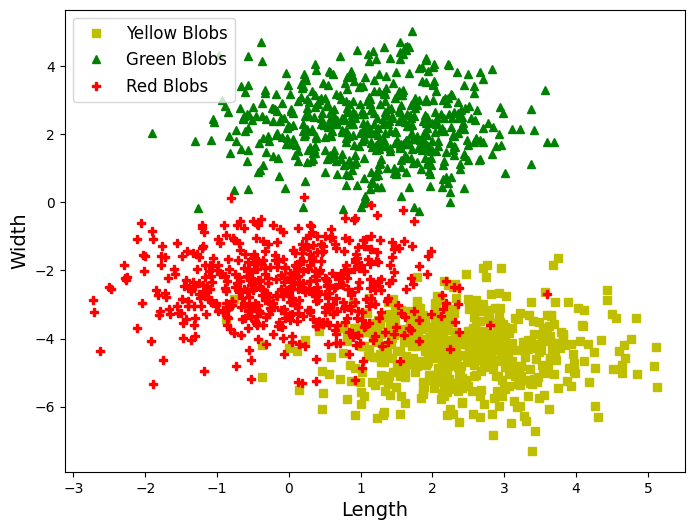

In [160]:
# X represents the 2 input features and y represents the 3 classes.
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# 2. my student ID is 1564710, so I set the random seed as 10
X, y = make_blobs(n_samples=1600, centers=3, n_features=2, center_box=(-4.5, 4.5),
 random_state=10)
print(X.shape)

# Plot the generated blobs
plt.figure(1, figsize=(8, 6))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ys", label="Yellow Blobs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Green Blobs")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rP", label="Red Blobs")
plt.xlabel("Length", fontsize=14)
plt.ylabel("Width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)


# 4. Considering X and y, is this a regression or classification problem?
# This is a classification problem because it involves predicting which of three distinct categories (represented by different colors) a data point belongs to.


In [161]:
# 5. Split the data into training and testing sets with the approximate ratio of 4 to 1.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Checking the shape of the datasets to ensure they are split correctly
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (1280, 2) (1280,)
Testing set size: (320, 2) (320,)


In [162]:
# 6.Train a Logistic Regression model using the training set
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=10)
# Train the model using the training data
log_reg.fit(X_train, y_train)


# Predict the labels for the testing data
y_pred_lr = log_reg.predict(X_test)
print(y_pred_lr)
# log_reg.score(X_test, y_test)
# log_reg.score(X_train, y_train)

[1 0 2 2 2 1 0 2 1 2 2 0 1 1 2 0 0 2 2 2 2 0 2 0 0 2 2 1 1 1 1 1 2 1 0 1 0
 0 1 1 2 0 1 2 2 1 1 2 0 0 2 2 2 0 2 0 1 2 0 0 2 2 1 2 0 0 1 2 0 2 0 2 0 2
 0 1 0 1 0 0 0 1 0 0 0 0 2 1 2 2 1 2 2 0 0 1 1 0 0 1 1 2 0 2 1 0 0 0 2 0 0
 0 1 2 2 2 1 2 0 1 0 0 1 0 0 0 2 0 1 2 0 2 0 2 2 0 2 2 0 2 1 0 0 1 1 0 2 2
 0 1 1 2 1 1 2 0 2 2 1 1 0 2 0 0 2 2 0 1 0 1 1 0 0 2 2 2 0 0 1 0 1 2 0 1 0
 1 0 1 1 2 2 2 0 0 2 1 1 1 2 0 1 1 1 0 2 0 1 2 2 0 0 0 2 2 1 2 1 1 1 2 1 1
 0 2 1 0 2 2 0 0 2 1 2 0 0 1 0 2 1 0 1 0 1 0 1 1 1 2 0 1 1 0 0 0 0 0 2 2 2
 2 0 2 0 1 1 1 2 2 2 0 2 0 2 1 2 1 1 0 1 0 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 1
 2 1 2 0 0 0 2 1 1 0 1 0 0 0 0 0 1 0 2 1 1 2 1 1]


In [163]:
# 7. Report the prediction performance of the trained Logistic Regression model using the testing set (X-test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate and print the accuracy in percentage
accuracy = accuracy_score(y_test, y_pred_lr) * 100
print(f"Accuracy of the model: {accuracy:.2f}%")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(class_report)

Accuracy of the model: 94.69%
Confusion Matrix:
[[107   0   6]
 [  0 102   0]
 [  9   2  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       113
           1       0.98      1.00      0.99       102
           2       0.94      0.90      0.92       105

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



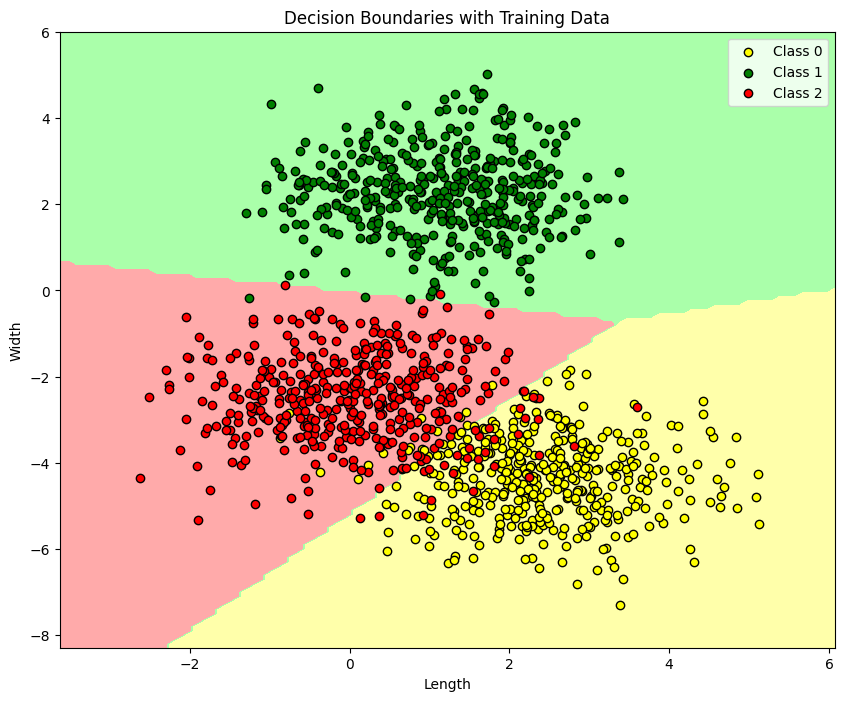

In [164]:
# (Bonus 1) Plot the decision boundaries of the trained Logistic Regression model using the training set

from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model):
    # Setup marker generator and color map
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#FFAAAA'])
    cmap_bold = ['yellow', 'green', 'red']

    # Create a mesh grid to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    for idx, color in enumerate(cmap_bold):
        plt.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=f'Class {idx}', edgecolor='k')

    plt.title('Decision Boundaries with Training Data')
    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.legend()

# Plot decision boundaries using the training set
plot_decision_boundaries(X_train, y_train, log_reg)
plt.show()

In [165]:
#8. Train a Linear SVM model using the training set 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Create a pipeline with a StandardScaler and a LinearSVC
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=10)),
])

# Train the Linear SVM model using the training data
svm_pipeline.fit(X_train, y_train)

# Predict the labels for the testing data using the trained pipeline
y_pred_svm = svm_pipeline.predict(X_test)
print(y_pred_svm)


[1 0 2 2 2 1 0 2 1 2 2 0 1 1 2 0 0 2 2 2 2 0 2 0 0 2 2 1 1 1 1 1 2 1 0 1 0
 0 1 1 2 0 1 2 2 1 1 2 0 0 2 2 2 0 2 0 1 2 0 0 2 2 1 2 0 0 1 2 0 2 0 2 0 2
 0 1 0 1 0 0 2 1 0 0 0 0 2 1 2 2 1 2 2 0 0 1 1 0 0 1 1 2 0 2 1 0 0 0 2 0 0
 0 1 2 2 0 1 2 0 1 0 0 1 0 0 2 0 0 1 2 0 2 0 2 2 0 2 2 0 2 1 0 0 1 1 0 2 2
 0 1 1 2 1 1 2 0 2 2 1 1 0 2 0 0 2 2 0 1 0 1 1 0 0 0 2 2 0 0 1 0 1 2 0 1 0
 1 0 1 1 2 2 2 0 0 2 1 1 1 2 0 1 1 1 0 2 0 1 2 2 0 0 0 2 2 1 2 1 1 1 2 1 1
 0 2 1 0 2 2 0 0 2 1 2 0 0 1 0 2 1 0 1 0 1 2 1 1 1 1 0 1 1 0 0 0 0 0 2 2 2
 2 0 2 0 1 1 1 2 2 2 0 2 0 2 1 2 1 1 0 1 0 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 1
 2 1 2 0 0 0 2 1 1 0 1 0 0 0 0 0 1 2 2 1 1 2 1 1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [166]:
# 9. Report the prediction performance of the trained SVM model using the testing set:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate and print the accuracy in percentage
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print(f"Accuracy of the SVM model: {accuracy:.2f}%")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(class_report)

Accuracy of the SVM model: 94.06%
Confusion Matrix:
[[106   0   7]
 [  0 102   0]
 [  9   3  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       113
           1       0.97      1.00      0.99       102
           2       0.93      0.89      0.91       105

    accuracy                           0.94       320
   macro avg       0.94      0.94      0.94       320
weighted avg       0.94      0.94      0.94       320



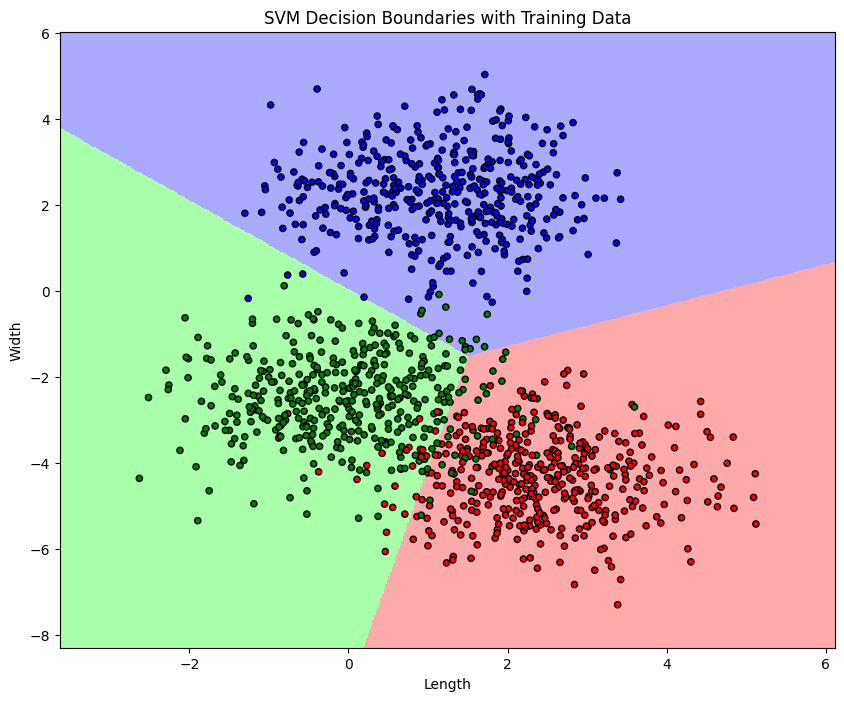

In [167]:

# (Bonus 2) Plot the decision boundaries of the trained SVM model using the training set.

import matplotlib.colors as mcolors

def plot_decision_boundaries(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ['red', 'blue', 'green']

    # Create a mesh to plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mcolors.ListedColormap(cmap_bold), edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Length')
    plt.ylabel('Width')

# Plot the decision boundaries using the training set
plot_decision_boundaries(X_train, y_train, svm_pipeline)
plt.title('SVM Decision Boundaries with Training Data')
plt.show()

In [168]:
# 10. Train a non-linear (with Kernel) SVM model using the training set

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# SVM classifier pipeline with polynomial kernel
polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, C=1, coef0=1))
])

# Training the classifier
polynomial_svm_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_SVM_non_linear = polynomial_svm_clf.predict(X_test)
print(y_pred_SVM_non_linear)



[1 0 2 2 2 1 0 2 1 2 2 0 1 1 2 0 0 2 2 2 2 0 2 0 0 2 2 1 1 1 1 1 2 1 0 1 0
 0 1 1 2 0 1 2 2 1 1 2 0 0 2 2 2 0 2 0 1 2 0 0 2 2 1 2 0 0 1 2 0 2 0 2 0 2
 0 1 0 1 0 0 0 1 0 0 0 0 2 1 2 2 1 2 2 0 0 1 1 0 0 1 1 2 0 2 1 0 0 0 2 0 0
 0 1 2 2 2 1 2 0 1 0 0 1 0 0 0 0 0 1 2 0 2 0 2 2 0 2 2 0 2 1 0 0 1 1 0 2 2
 0 1 1 2 1 1 2 0 2 2 1 1 0 2 0 0 2 2 0 1 0 1 1 0 0 0 2 2 0 0 1 0 1 2 0 1 0
 1 0 1 1 2 2 2 0 0 2 1 1 1 2 0 1 1 1 0 2 0 1 2 2 0 0 0 2 2 1 2 1 1 1 2 1 1
 0 2 1 0 2 2 0 0 2 1 2 0 0 1 0 2 1 0 1 0 1 0 1 1 1 2 0 1 1 0 0 0 0 0 2 2 2
 2 0 2 0 1 1 1 2 2 2 0 2 0 2 1 2 1 1 0 1 0 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 1
 2 1 2 0 0 0 2 1 1 0 1 0 0 0 0 0 1 0 2 1 1 2 1 1]


In [169]:
# 11. Report the prediction performance of the trained non-linear SVM model using the testing set
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred_SVM_non_linear) * 100

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM_non_linear)

# Print the classification report
class_report = classification_report(y_test, y_pred_SVM_non_linear)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.98      1.00      0.99       102
           2       0.95      0.89      0.92       105

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



In [170]:
# 12. Train a Random Forests model using the training set

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the given parameters
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=10)

# Fit the model to the training dataset
rnd_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rnd_clf.predict(X_test)
print(y_pred_rf)

[1 0 2 2 2 1 0 2 1 2 2 0 1 1 2 0 0 2 2 2 2 0 2 0 0 2 2 1 1 1 1 1 2 1 0 1 0
 0 1 1 2 0 1 2 2 1 1 2 0 0 2 2 2 0 2 0 1 2 0 0 2 2 1 2 0 0 1 0 0 2 0 2 0 2
 0 1 0 1 0 0 2 1 0 0 0 0 2 1 2 2 1 2 2 0 0 1 1 0 0 1 1 2 0 2 1 0 0 0 2 0 0
 0 1 2 2 0 1 2 0 1 0 0 1 0 0 2 2 0 1 2 0 2 0 2 2 0 2 2 0 2 1 0 0 1 1 0 2 2
 0 1 1 2 1 1 2 0 2 2 1 1 0 2 0 0 2 2 0 1 0 1 1 0 0 0 2 2 0 0 1 0 1 2 0 1 0
 1 0 1 1 2 2 2 0 0 2 1 1 1 2 0 1 1 1 0 2 0 1 2 2 0 0 0 2 2 1 2 1 1 1 2 1 1
 0 2 1 0 2 2 0 0 2 1 0 0 0 1 0 2 1 0 1 0 1 0 1 1 1 2 0 1 1 0 0 0 0 0 2 2 2
 2 0 2 0 1 1 1 2 2 2 0 2 0 2 1 2 1 1 0 1 0 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 1
 2 1 2 0 0 0 2 1 1 0 1 0 0 0 0 0 1 0 2 1 1 2 1 1]


In [171]:
# 13. Report the prediction performance of the trained Random Forests model using the testing set

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Print the accuracy of the model in percentage
print("Accuracy:", accuracy_score(y_test, y_pred_rf) * 100, "%")

# Print the Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Print the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 94.0625 %
Confusion Matrix:
 [[107   0   6]
 [  0 102   0]
 [ 11   2  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       113
           1       0.98      1.00      0.99       102
           2       0.94      0.88      0.91       105

    accuracy                           0.94       320
   macro avg       0.94      0.94      0.94       320
weighted avg       0.94      0.94      0.94       320



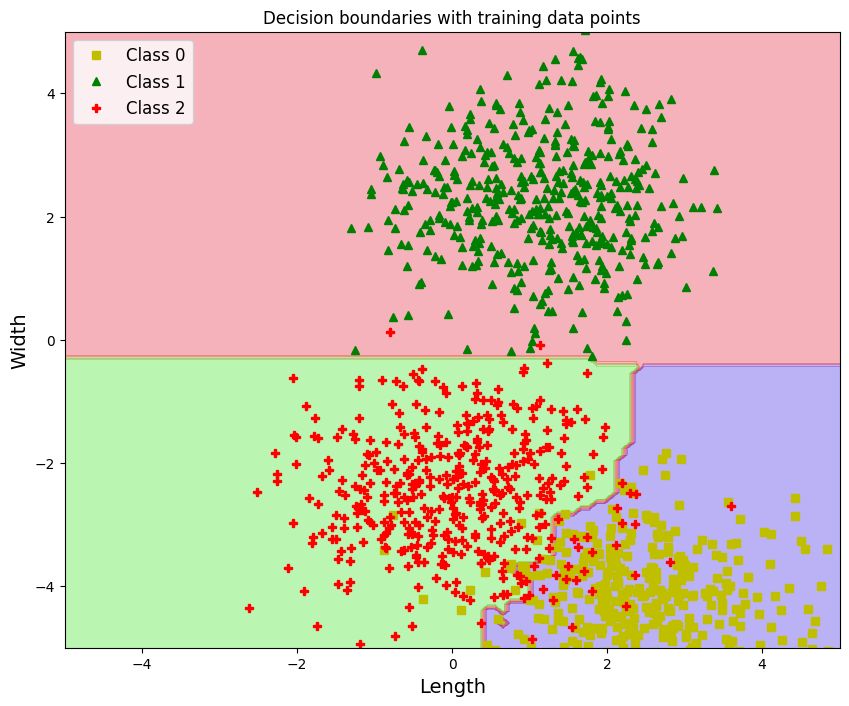

In [172]:
# (Bonus 3) Plot the decision boundaries of the trained Random Forests model using the training set

# Function to plot decision boundaries
def plot_decision_boundaries(clf, X, y, axes=[-5, 5, -5, 5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.brg)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ys", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rP", label="Class 2")
    plt.xlabel("Length", fontsize=14)
    plt.ylabel("Width", fontsize=14)
    plt.legend(loc="upper left", fontsize=12)
    plt.axis(axes)
    plt.title("Decision boundaries with training data points")

# Plotting the decision boundaries
plot_decision_boundaries(rnd_clf, X_train, y_train)
plt.show()

In [173]:
# 14. Compare the accuracy, classification reports and confusion matrix of the four trained models and explain, in one paragraph, why you think the results are like that. Write your answer as a comment at the end of your Python code. You do not need to submit another file for this.

In [174]:
#15.  Use the iris dataset to build a Logistic Regression classifier to detect the Iris virginica, setosa and versicolor (3 classes) based on the petal width, petal length, sepal width and petal length features (4 Features). 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Print the accuracy of the model in percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Print the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print the Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [175]:
# 16. Use the iris dataset to build a Non-Linear SVM classifier to detect the Iris virginica,setosa and versicolor (3 classes) based on the petal width, petal length, sepal width and petal length features 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train an SVM model with a non-linear kernel (RBF by default)
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_clf.predict(X_test)

# Calculate and print the accuracy of the model in percentage
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"Accuracy: {accuracy_svm:.2f}%")

# Print the Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

# Print the Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(class_report_svm)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [176]:
# 17. Use the iris dataset to build a Decision Trees classifier to detect the Iris virginica, setosa and versicolor (3 classes) based on the petal width, petal length, sepal width and petal length features 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a Decision Trees model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_clf.predict(X_test)

# Calculate and print the accuracy of the model in percentage
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f"Accuracy: {accuracy_dt:.2f}%")

# Print the Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Print the Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report_dt)

# Function to print the final gini values for all final nodes
def print_final_gini_values(tree):
    # The tree attribute holds a lot of information including the children_left and children_right which are arrays
    # that give you the indices of the left child and right child of a given node.
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right

    # The impurity attribute gives the gini impurity of the node.
    impurity = tree.tree_.impurity

    # The value attribute gives the class distribution in the node.
    values = tree.tree_.value

    # Loop through the nodes and print the gini values for the final nodes
    for i in range(n_nodes):
        # If the left child of a node is -1, that node is a leaf (final node)
        if children_left[i] == children_right[i]:
            print(f"Node {i} is a final node with Gini impurity {impurity[i]:.2f} and values {values[i]}")

# Print the final gini values for all final nodes
print("Final Gini Values for All Final Nodes:")
print_final_gini_values(dt_clf)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Final Gini Values for All Final Nodes:
Node 1 is a final node with Gini impurity 0.00 and values [[1. 0. 0.]]
Node 4 is a final node with Gini impurity 0.00 and values [[0. 1. 0.]]
Node 5 is a final node with Gini impurity 0.00 and values [[0. 0. 1.]]
Node 8 is a final node with Gini impurity 0.00 and values [[0. 1. 0.]]
Node 10 is a final node with Gini impurity 0.00 and values [[0. 0. 1.]]
Node 12 is a final node with Gini impurity 0.00 and values [[0. 1. 0.]]
Node 13 is a final node with Gini impurity 0.00 and valu

In [177]:
# 18. Use the iris dataset to build a Random Forrest classifier to detect the Iris virginica, setosa and versicolor (3 classes) based on the petal width, petal length, sepal width and petal length features


from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,random_state=10)
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate and print the accuracy of the model in percentage
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy: {accuracy_rf:.2f}%")

# Print the Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Print the Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [178]:
# 19. Download the “possum.csv” file from Moodle – Topic 2, then import it to your python environment via the following code:

# read the csv file from a location you have copied the file
import pandas as pd


df = pd.read_csv("./possum.csv")
#clean up and remove any rows with missing data with
df = df.dropna()
#remove the unnecessary columns, then store the features and the label data in separate variables
X = df.drop(["case", "site", "Pop", "sex"], axis=1)
y = df["sex"]

# How many samples are in the dataset? 
# Number of samples in the dataset: 101
num_samples = len(df)
print("Number of samples in the dataset:", num_samples)

Number of samples in the dataset: 101


In [179]:
# Print the randomness factor of the dataset
from scipy.stats import entropy

# Convert label counts to probability distribution
label_probs = y.value_counts(normalize=True)
label_entropy = entropy(label_probs, base=2)  # Using base 2 to measure entropy in bits
print("Entropy of the label (sex):", label_entropy)

Entropy of the label (sex): 0.9794662187017298


In [180]:
# Split the data into 80% training and 20% testing.
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# How many features are in the datasets? 
# Number of features in the dataset: 10
num_features = X.shape[1]  # Number of columns in X
print("Number of features in the dataset:", num_features)

# How many classes are targeted in this question? 
# Number of classes in the 'sex' column: 2
num_classes = y.nunique()
print("Number of classes in the 'sex' column:", num_classes)


Number of features in the dataset: 10
Number of classes in the 'sex' column: 2


In [181]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# Print the accuracy of the Logistic Regression model in percentage
accuracy = log_reg.score(X_test, y_test) * 100  
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}%")




Accuracy of the Logistic Regression model: 71.43%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
# Train a non-linear SVM model
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma='scale')  # 'gamma' can be 'scale' or 'auto'; 'scale' is generally better
svm_clf.fit(X_train, y_train)

# Print the accuracy of the SVM model in percentage
accuracy_svm = svm_clf.score(X_test, y_test) * 100  # Multiply by 100 to convert to percentage
print(f"Accuracy of the non-linear SVM model: {accuracy_svm:.2f}%")


Accuracy of the non-linear SVM model: 57.14%


In [183]:
# Train a Random Forrest model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,random_state=10)  # n_estimators is the number of trees, 
rf_clf.fit(X_train, y_train)

# How many trees did you use on your RF model? 
# the number of trees is 500

# What is the max_leaf_nodes for your RF model? 
# the max_leaf_nodes is 16

# Print the accuracy of the Random Forrest model in percentage.
accuracy_rf = rf_clf.score(X_test, y_test) * 100  # Multiply by 100 to convert to percentage
print(f"Accuracy of the Random Forest model: {accuracy_rf:.2f}%")

# How much deep did you go in your RF model (Depth_level)? 
# Maximum depth reached in the Random Forest: 12

max_depths = [tree.tree_.max_depth for tree in rf_clf.estimators_]
max_depth = max(max_depths)  # The deepest tree in the forest
print(f"Maximum depth reached in the Random Forest: {max_depth}")



Accuracy of the Random Forest model: 71.43%
Maximum depth reached in the Random Forest: 12


In [184]:
#20. Which model Performs better? Why do you think it is performing better? 

# Logistic Regression and Random Forest both achieved 71.43% accuracy, making them the top performers.Non-linear SVM had a lower accuracy of 57.14%.
# Logistic Regression and Random Forest did the best. Logistic Regression is simpler and easier to understand, while Random Forest is more robust and can handle more complex data if needed.


In [185]:
# 21. Print the importance value of every feature in your database

# Extract and print feature importance
feature_importances = rf_clf.feature_importances_
features = X.columns  # Get the feature names from the DataFrame

# Print the importance of each feature
print("Feature importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

Feature importances:
age: 0.0498
hdlngth: 0.1350
skullw: 0.0944
totlngth: 0.1120
taill: 0.0947
footlgth: 0.1082
earconch: 0.0974
eye: 0.1344
chest: 0.0696
belly: 0.1045


In [186]:
# 22.Use the Wine Recognition dataset from scikit-learn to build a classification model that predicts the origin of wines (three classes) based on their chemical properties. Perform the following tasks:

# Load the Dataset:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

# How many samples does the dataset have? 
# Number of samples in the dataset: 178
num_samples = X.shape[0]
print("Number of samples in the dataset:", num_samples)

# How many features? 
# Number of features in the dataset: 13
num_features = X.shape[1]
print("Number of features in the dataset:", num_features)

# Split the Data into Training and Testing Sets:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

Number of samples in the dataset: 178
Number of features in the dataset: 13


In [187]:
# Compare the accuracy of Random Forest Classifier, SVM, Decision Tree and Logistic Regression on the test set. Then write a brief discussion about their performance.
# Consider factors like overfitting, model complexity, and interpretability (write the code too) 


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the models
rf_classifier = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16, random_state=10)
svm_classifier = SVC(kernel='linear', random_state=10)
dt_classifier = DecisionTreeClassifier(random_state=10)
lr_classifier = LogisticRegression(max_iter=1000, random_state=10)

# Train the models
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Based on the results from the model testing:
# Random Forest and Decision Tree both achieved the highest accuracy of 71%.SVM performed slightly lower with an accuracy of 67%.Logistic Regression had the lowest accuracy at 62%.

# Random Forest and Decision Tree both had high accuracy, but Random Forest is preferred because it manages overfitting better by using many trees.SVM performed decently but might struggle with complex data and requires more computing power.Logistic Regression underperformed, suggesting it's too simplistic for complex data pattern.

# In terms of model complexity and interpretability: Logistic Regression is the simplest and easiest to understand, followed by Decision Trees. Random Forest adds complexity but allows some insight through feature importance, whereas SVM is the least interpretable, especially with non-linear kernels.

# Conclusion: For this dataset, both Random Forest and Decision Tree performed well. However, Random Forest may be favored for its robustness against overfitting and its slightly more complex but manageable interpretation, despite Decision Tree's simpler model structure.


Random Forest Accuracy: 1.00
SVM Accuracy: 1.00
Decision Tree Accuracy: 0.94
Logistic Regression Accuracy: 0.97


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
